In [13]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd

In [14]:
paths_to_csv = {}

In [15]:
path_tds_angles = '../../results/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [16]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [17]:
paths_to_csv

{'S001C': [('angl_bow_mov',
   '../../results/TSD_angles\\S001C\\angl_bow_mov.csv'),
  ('angl_head_inclination',
   '../../results/TSD_angles\\S001C\\angl_head_inclination.csv'),
  ('angl_left_cheek_mov',
   '../../results/TSD_angles\\S001C\\angl_left_cheek_mov.csv'),
  ('angl_left_elbow_mov',
   '../../results/TSD_angles\\S001C\\angl_left_elbow_mov.csv'),
  ('angl_left_fingers_pos_mov',
   '../../results/TSD_angles\\S001C\\angl_left_fingers_pos_mov.csv'),
  ('angl_left_hips_mov',
   '../../results/TSD_angles\\S001C\\angl_left_hips_mov.csv'),
  ('angl_left_should_mov',
   '../../results/TSD_angles\\S001C\\angl_left_should_mov.csv'),
  ('angl_left_wrist_round',
   '../../results/TSD_angles\\S001C\\angl_left_wrist_round.csv'),
  ('angl_right_cheek_mov',
   '../../results/TSD_angles\\S001C\\angl_right_cheek_mov.csv'),
  ('angl_right_elbow_mov',
   '../../results/TSD_angles\\S001C\\angl_right_elbow_mov.csv'),
  ('angl_right_fingers_pos_mov',
   '../../results/TSD_angles\\S001C\\angl_right_

In [ ]:
# sort values to show firstly C class then I and S
names_of_videos = [v for v in paths_to_csv.keys()]
names_of_videos.sort(key=lambda v: v[::-1])
print(names_of_videos)

In [ ]:
angles = pd.read_csv(paths_to_csv[names_of_videos[0]][0][1])['angle'].to_list()

In [ ]:
num_of_metrics = len(paths_to_csv[names_of_videos[0]])

In [ ]:
limits_max = np.zeros(num_of_metrics)
limits_min = [10000]*num_of_metrics
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = pd.read_csv(curr_path)['angle'].to_list()
        angle_max = max(angles)
        angle_min = min(angles)
        if limits_max[j] < angle_max:
            limits_max[j] = angle_max
        if limits_min[j] > angle_min:
            limits_min[j] = angle_min

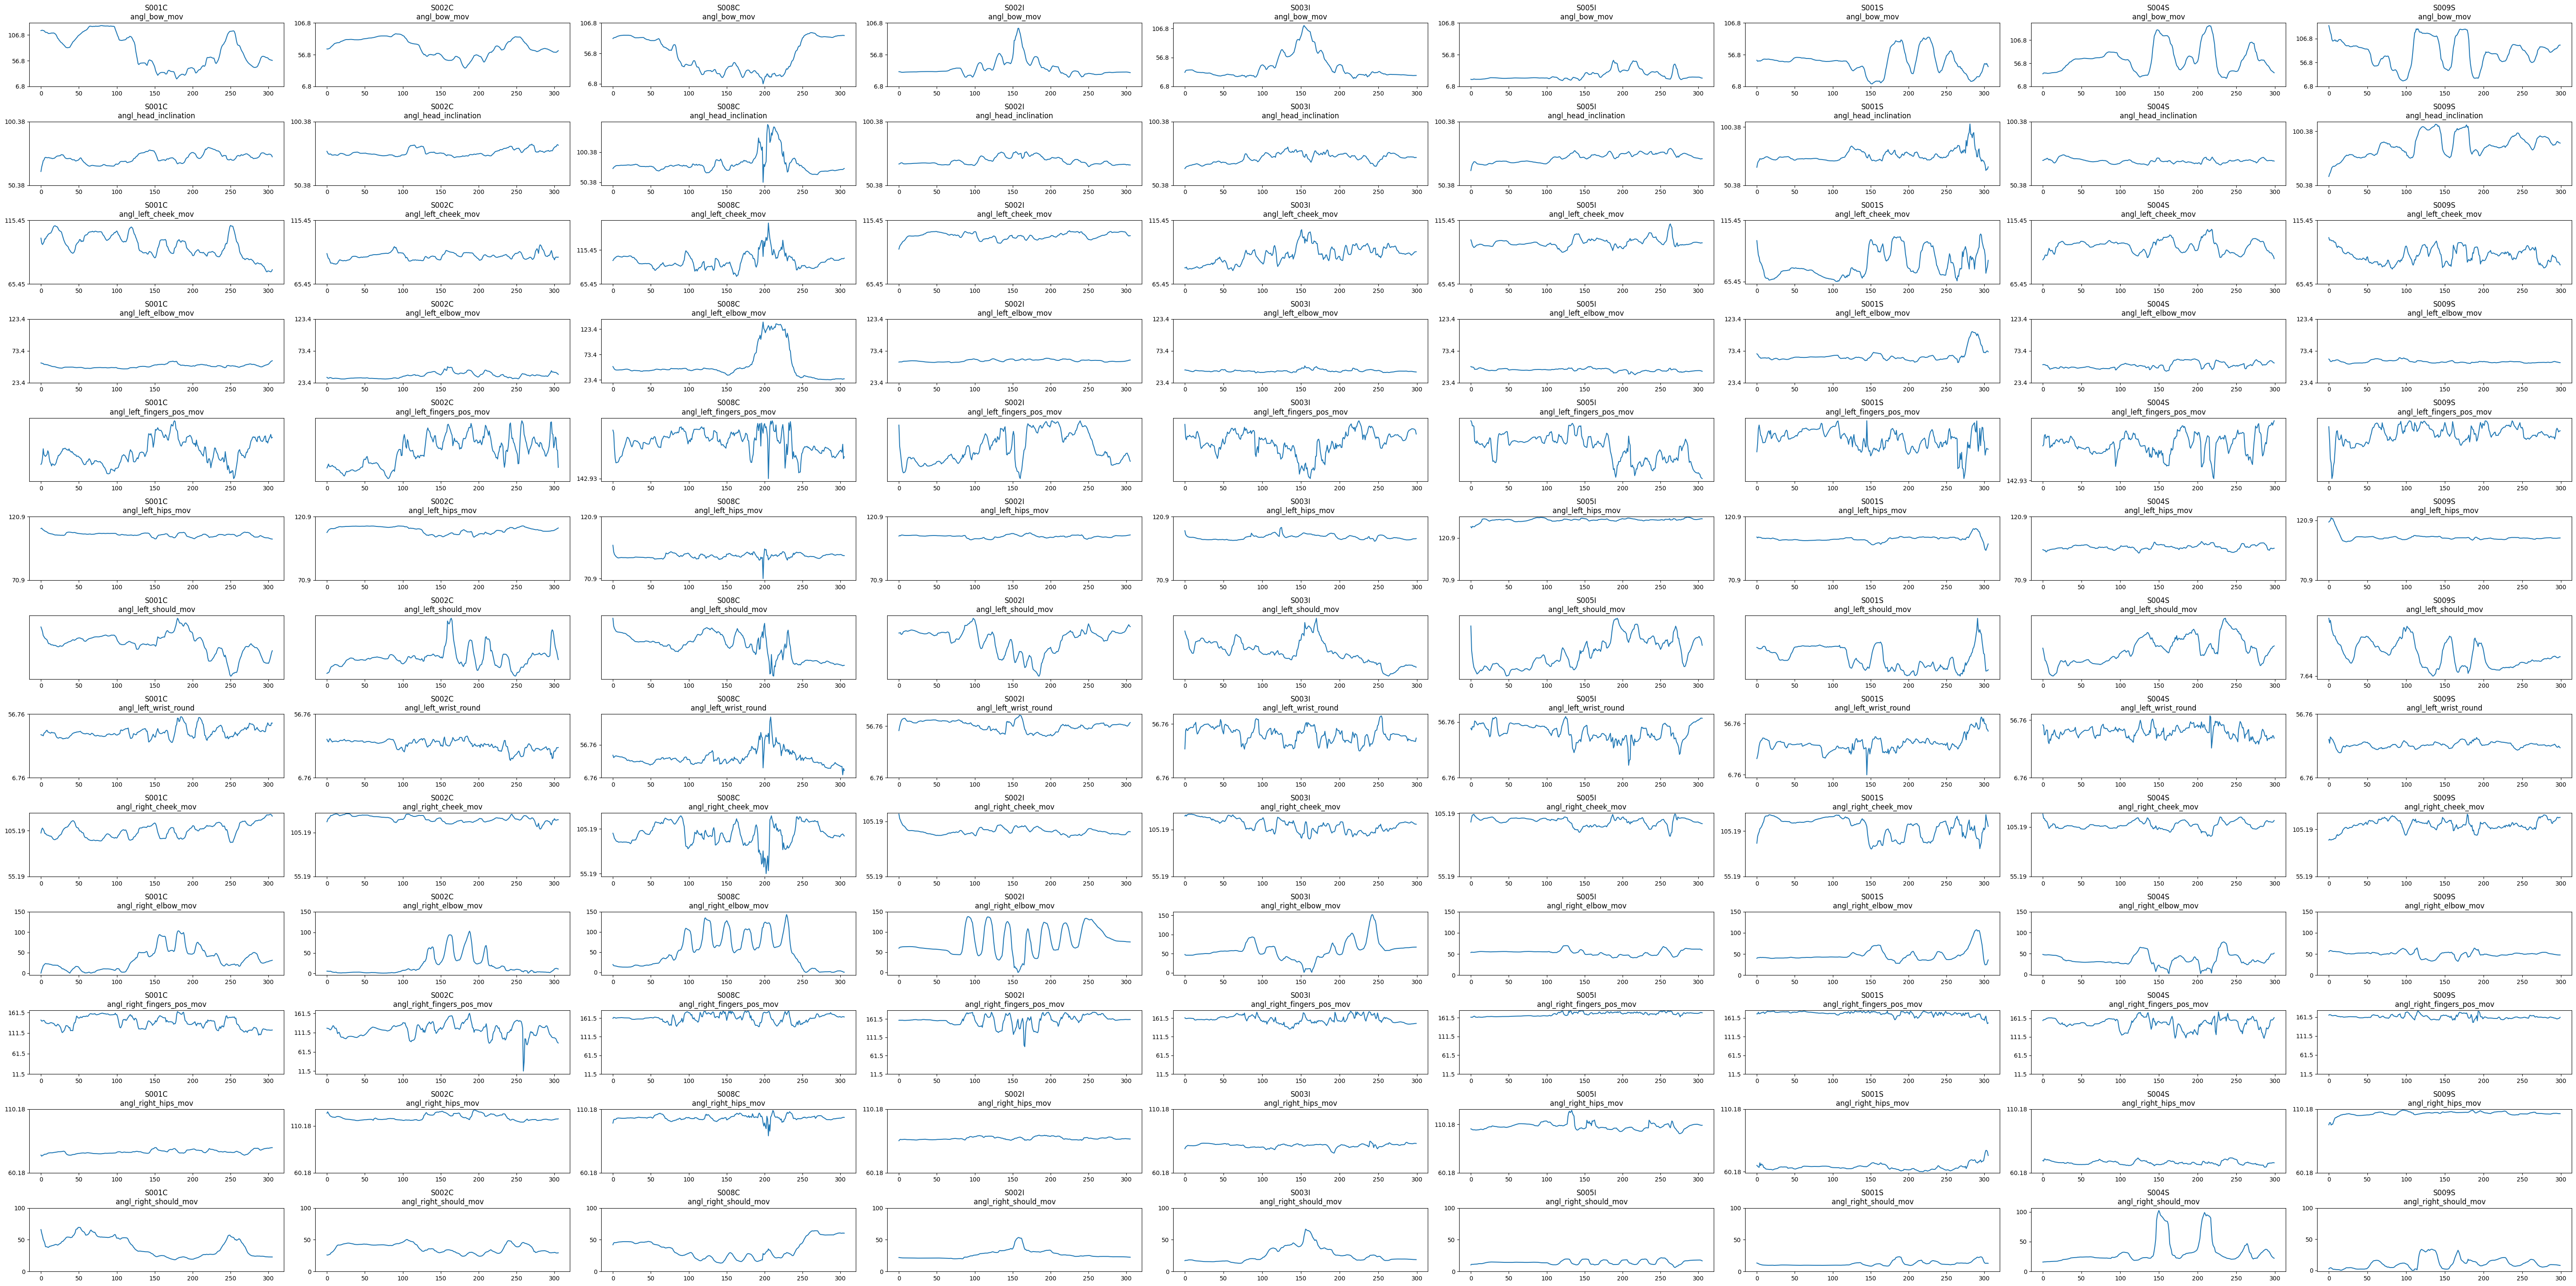

In [ ]:
fig, axs = plt.subplots(len(paths_to_csv['S005I']),len(names_of_videos), figsize=(60, 30))
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles = pd.read_csv(curr_path)['angle'].to_list()
        axs[j][i].plot(angles)
        axs[j][i].title.set_text(names_of_videos[i] + "\n" + curr_metric)
        axs[j][i].set_yticks(np.arange(limits_min[j], limits_max[j], step=50))
plt.tight_layout()
plt.savefig("results_consider_angles.png")
plt.show()

In [ ]:
names_of_metrics = []
for i in range(len(names_of_videos)):
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        names_of_metrics.append(curr_metric)
    break

sample_tsd = pd.read_csv(curr_path)['angle'].to_list()
names_metrics_and_features = []
for metr in names_of_metrics:
    for feature_n in create_feature_dict_from_tsd(sample_tsd).keys():
        names_metrics_and_features.append(f"{metr}_{feature_n}")

In [ ]:
di_df = {}
di_df["features_of_metrics"] = names_metrics_and_features

In [ ]:
for i in range(len(names_of_videos)):
    curr_metrics = []
    for j in range(num_of_metrics):
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        angles_tsd = pd.read_csv(curr_path)['angle'].to_list()
        features_di = create_feature_dict_from_tsd(angles_tsd)
        features = list(features_di.values())
        curr_metrics.extend(features)
    di_df[names_of_videos[i]] = curr_metrics

In [26]:
df = pd.DataFrame(data=di_df)
df.to_csv("../../results/TSD_angles/extracted_features.csv")

In [27]:
df

,features_of_metrics,S001C,S002C,S002I,S003I,S005I,S001S,S004S,S009S
0,angl_bow_mov_mean,76.830251+0.000000j,68.583402+0.000000j,35.365808+0.000000j,39.916350+0.000000j,24.163687+0.000000j,44.868354+0.000000j,65.991443+0.000000j,78.625578+0.000000j
1,angl_bow_mov_var,1043.06621+0.00000j,186.077299+0.000000j,177.082557+0.000000j,447.781385+0.000000j,52.490857+0.000000j,294.830209+0.000000j,790.162151+0.000000j,805.973607+0.000000j
2,angl_bow_mov_mad,30.385701+0.000000j,11.748290+0.000000j,3.8219550+0.0000000j,4.8431270+0.0000000j,1.9893340+0.0000000j,8.0152080+0.0000000j,17.207783+0.000000j,20.075995+0.000000j
3,angl_bow_mov_max,125.061729+0.000000j,89.598037+0.000000j,98.233452+0.000000j,111.928556+0.000000j,47.888241+0.000000j,84.296444+0.000000j,138.640912+0.000000j,134.162943+0.000000j
4,angl_bow_mov_min,21.250317+0.000000j,35.509156+0.000000j,21.128953+0.000000j,20.458603+0.000000j,15.993056+0.000000j,10.673398+0.000000j,24.094896+0.000000j,18.369220+0.000000j
...,...,...,...,...,...,...,...,...,...
242,angl_right_should_mov_meanFreq,65.955493+0.000000j,26.048732+0.000000j,21.984242-0.000000j,17.074938-0.000000j,10.374508-0.000000j,13.361468+0.000000j,15.841057+0.000000j,2.5197400+0.0000000j
243,angl_right_should_mov_skewnessFreq,17.257566+0.000000j,17.542095-0.000000j,16.261595-0.000000j,13.339921-0.000000j,17.431341+0.000000j,18.225815-0.000000j,15.843463+0.000000j,12.914536-0.000000j
244,angl_right_should_mov_kurtosisFreq,304.867259+0.000000j,304.282794-0.000000j,275.862272-0.000000j,216.747833-0.000000j,301.376363+0.000000j,320.042116-0.000000j,262.574597+0.000000j,210.276003+0.000000j
245,angl_right_should_mov_median,38.077658+0.000000j,35.774391+0.000000j,24.186996+0.000000j,20.059365+0.000000j,14.384317+0.000000j,10.700603+0.000000j,24.422180+0.000000j,9.1975130+0.0000000j


In [28]:
correl = df.corr()

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\pandas\core\internals\managers.py:1464: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)  # type: ignore[arg-type]


In [29]:
correl.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002C,S002I,S003I,S005I,S001S,S004S,S009S
S001C,1.000000,0.979585,0.975323,0.984160,0.965048,0.977015,0.997006,0.986382
S002C,0.979585,1.000000,0.948620,0.963801,0.955429,0.942674,0.969717,0.975943
S002I,0.975323,0.948620,1.000000,0.994115,0.984238,0.982389,0.982174,0.977898
S003I,0.984160,0.963801,0.994115,1.000000,0.986413,0.991034,0.990676,0.986786
S005I,0.965048,0.955429,0.984238,0.986413,1.000000,0.974136,0.968510,0.973377
S001S,0.977015,0.942674,0.982389,0.991034,0.974136,1.000000,0.987413,0.982940
S004S,0.997006,0.969717,0.982174,0.990676,0.968510,0.987413,1.000000,0.986990
S009S,0.986382,0.975943,0.977898,0.986786,0.973377,0.982940,0.986990,1.000000


In [30]:
correl_2 = df.drop('S002C', axis=1).corr()

In [31]:
correl_2.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002I,S003I,S005I,S001S,S004S,S009S
S001C,1.000000,0.975323,0.984160,0.965048,0.977015,0.997006,0.986382
S002I,0.975323,1.000000,0.994115,0.984238,0.982389,0.982174,0.977898
S003I,0.984160,0.994115,1.000000,0.986413,0.991034,0.990676,0.986786
S005I,0.965048,0.984238,0.986413,1.000000,0.974136,0.968510,0.973377
S001S,0.977015,0.982389,0.991034,0.974136,1.000000,0.987413,0.982940
S004S,0.997006,0.982174,0.990676,0.968510,0.987413,1.000000,0.986990
S009S,0.986382,0.977898,0.986786,0.973377,0.982940,0.986990,1.000000


In [32]:
correl_3 = df.drop('S002C', axis=1).drop('S005I', axis=1).corr()

In [33]:
correl_3.style.highlight_min(color = 'gray', axis = 1)

,S001C,S002I,S003I,S001S,S004S,S009S
S001C,1.000000,0.975323,0.984160,0.977015,0.997006,0.986382
S002I,0.975323,1.000000,0.994115,0.982389,0.982174,0.977898
S003I,0.984160,0.994115,1.000000,0.991034,0.990676,0.986786
S001S,0.977015,0.982389,0.991034,1.000000,0.987413,0.982940
S004S,0.997006,0.982174,0.990676,0.987413,1.000000,0.986990
S009S,0.986382,0.977898,0.986786,0.982940,0.986990,1.000000
